In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data = data.join(pd.Series(boston.target, name='Prices'))

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data.info()

# no null values
# all are float 64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Prices   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

# chas can be boolean 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.CHAS = data.CHAS.astype('int')

In [10]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
import seaborn as sns


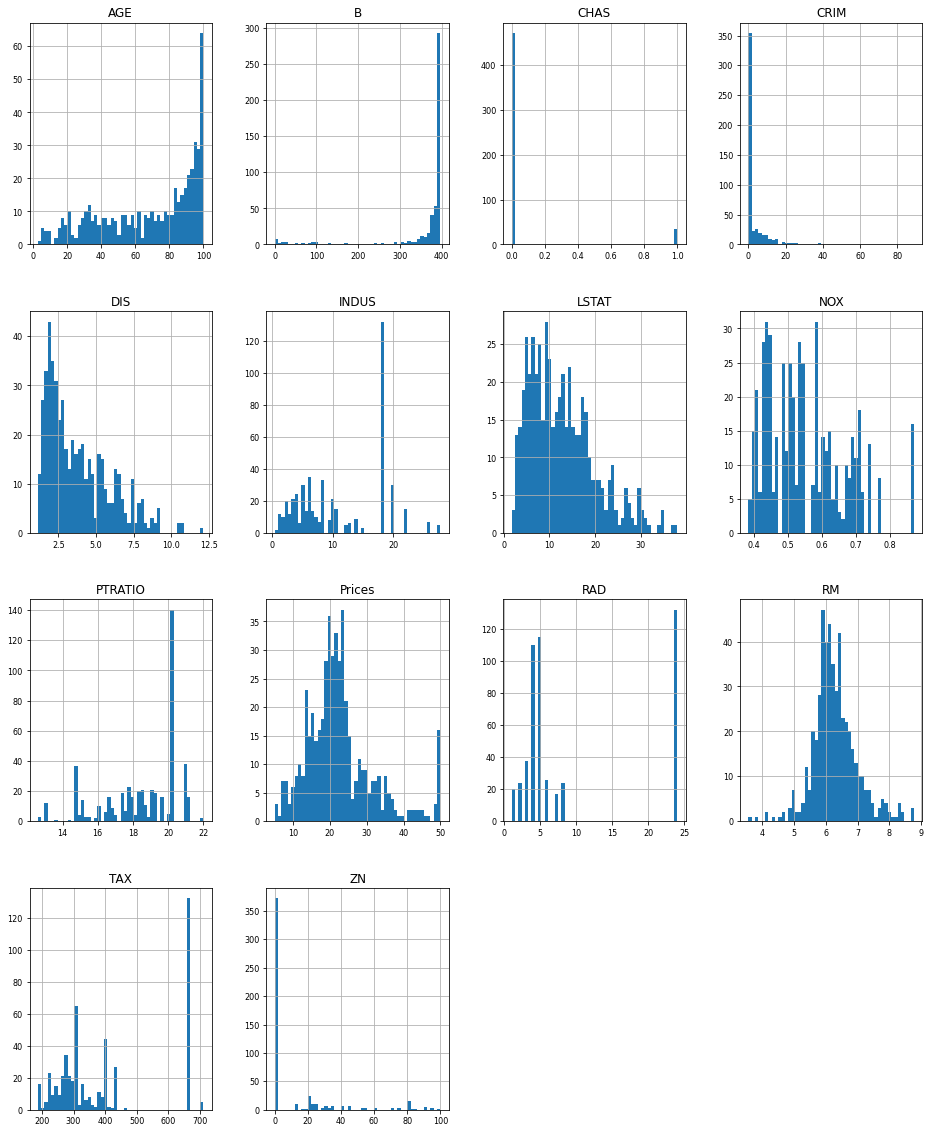

In [60]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

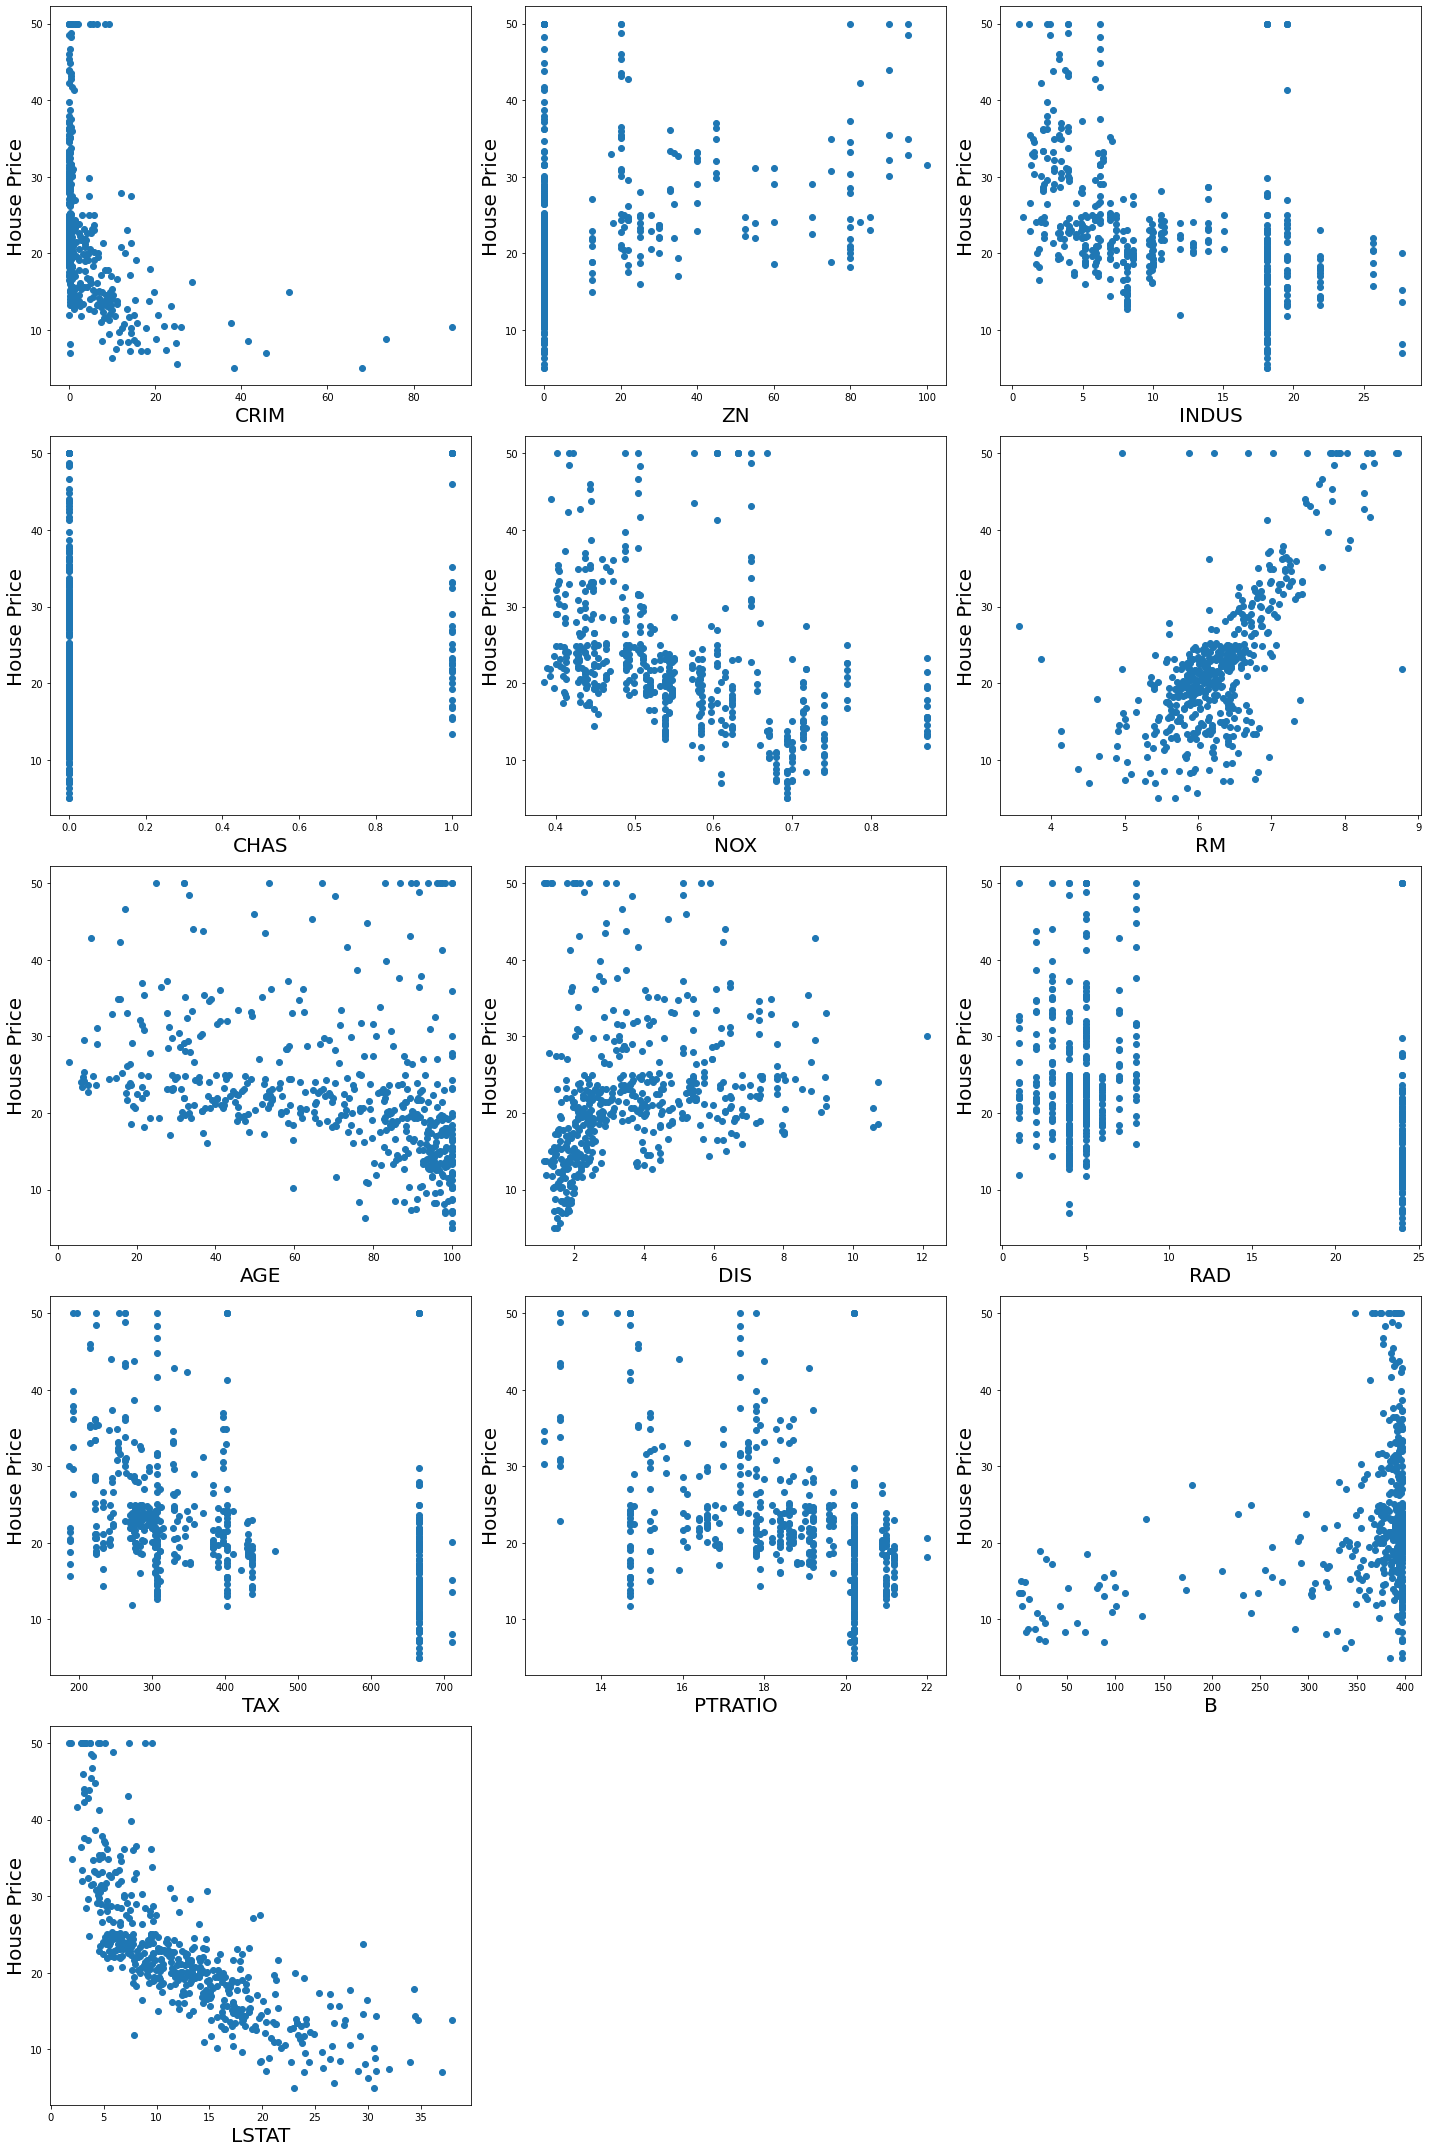

In [63]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in boston.feature_names:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('House Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

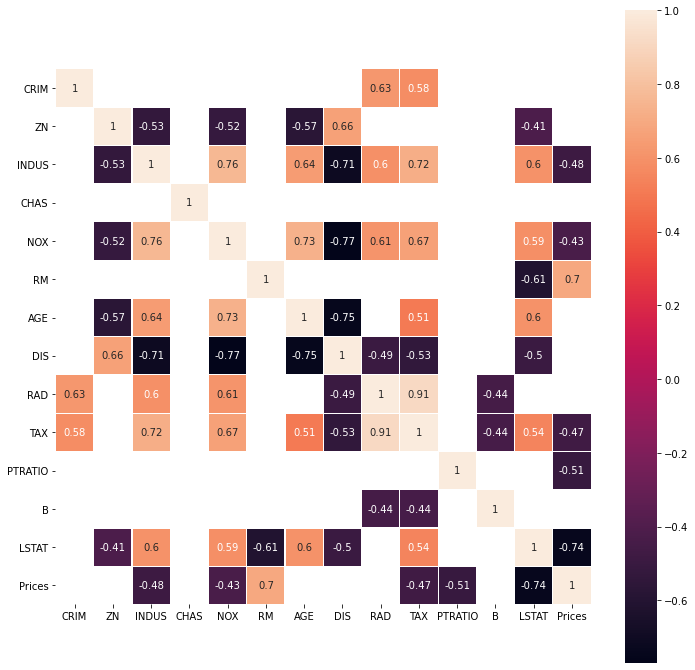

In [14]:
fig,ax = plt.subplots(figsize=(12,12))
corr = data.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)]
            ,annot=True,linewidths=0.1, square=True ,ax=ax);

### For now we will take all independent variables in consideration but after that we will take LSTAT, PTRATIO, TAX, RM, NOX, INDUS and see wheather they can improve the predictions of our model

In [17]:
data1 = pd.DataFrame(boston.data, columns=boston.feature_names)

In [18]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(data1)
y = boston.target

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

In [22]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(x_train,y_train)

reg1.score(x_test, y_test)

0.7519030329262334

In [36]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x_train,y_train,reg1)

0.7210541557516514

### We got 0.75 for r2 and 0.72 for adjusted r2 when we used just simple linear regression

## Now, lets try to see ridge, lasso and elastic net on this

In [41]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

from sklearn.linear_model import RidgeCV,Ridge

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(x_train, y_train)

ridgecv.alpha_

0.46077445195167765

In [42]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.46077445195167765)

In [43]:
ridge_model.score(x_test,y_test)

0.751654996478677

In [44]:
adj_r2(x_test,y_test,ridge_model)

0.7230843323567548

In [46]:
# Lasso

from sklearn.linear_model import LassoCV,Lasso

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [47]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [48]:
lasso_reg.score(x_test, y_test)

0.7518957038694827

In [ ]:
# we dont need to use elastic net

### Turns out our model is not overfitting the data... but lets try to use then same thing on data which is more correlated with the price and see if we can make a good difference in our results

In [53]:
data2 = data1[['LSTAT', 'PTRATIO', 'TAX', 'RM', 'NOX', 'INDUS']]
y = boston.target # again

In [55]:
scaler = StandardScaler()

X_scaled2 = scaler.fit_transform(data2)
y = boston.target

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled2, y, test_size=0.25, random_state=355)

from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(x_train2,y_train2)

reg2.score(x_test2, y_test2)

0.6937490750942003

In [57]:
adj_r2(x_train2,y_train2,reg2)

0.6669188730381548

## ok... i was expecting better results but its ok... we got a r2 score of 75% from our basic model with all parameters included